In [1]:
import pandas as pd
df = pd.read_csv("customer_churn_2000.csv")
df.head()


,customer_id,age,gender,country,subscription_length,monthly_fee,nb_support_tickets,last_login_days,contract_type,is_active,churn
0,C0001,41,F,Spain,13,18.54,2,23,Monthly,1,0
1,C0002,34,F,Canada,14,30.21,1,85,Monthly,1,0
2,C0003,43,F,Belgium,6,22.64,0,76,Monthly,1,0
3,C0004,54,F,France,44,44.27,3,16,Monthly,1,0
4,C0005,33,M,France,9,43.45,2,77,Monthly,0,1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("customer_churn_2000.csv")
df.head()


,customer_id,age,gender,country,subscription_length,monthly_fee,nb_support_tickets,last_login_days,contract_type,is_active,churn
0,C0001,41,F,Spain,13,18.54,2,23,Monthly,1,0
1,C0002,34,F,Canada,14,30.21,1,85,Monthly,1,0
2,C0003,43,F,Belgium,6,22.64,0,76,Monthly,1,0
3,C0004,54,F,France,44,44.27,3,16,Monthly,1,0
4,C0005,33,M,France,9,43.45,2,77,Monthly,0,1


In [3]:
df.info()
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())
print("\nNombre de doublons :", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          2000 non-null   object 
 1   age                  2000 non-null   int64  
 2   gender               2000 non-null   object 
 3   country              2000 non-null   object 
 4   subscription_length  2000 non-null   int64  
 5   monthly_fee          2000 non-null   float64
 6   nb_support_tickets   2000 non-null   int64  
 7   last_login_days      2000 non-null   int64  
 8   contract_type        2000 non-null   object 
 9   is_active            2000 non-null   int64  
 10  churn                2000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 172.0+ KB

Valeurs manquantes par colonne :
customer_id            0
age                    0
gender                 0
country                0
subscription_length    0
monthly_fee         

In [4]:
print(df.describe())

               age  subscription_length  monthly_fee  nb_support_tickets  \
count  2000.000000          2000.000000  2000.000000          2000.00000   
mean     36.360000            18.902500    29.564645             0.57750   
std      11.212058            18.767528     8.637906             0.79329   
min      18.000000             1.000000     5.000000             0.00000   
25%      28.000000             6.000000    23.807500             0.00000   
50%      36.000000            13.000000    29.425000             0.00000   
75%      44.000000            26.000000    35.260000             1.00000   
max      75.000000           132.000000    58.020000             4.00000   

       last_login_days    is_active        churn  
count      2000.000000  2000.000000  2000.000000  
mean         46.797500     0.713000     0.260500  
std          26.402823     0.452475     0.439017  
min           0.000000     0.000000     0.000000  
25%          24.000000     0.000000     0.000000  
50%      

In [5]:
for col in ["gender", "country", "contract_type"]:
    print(f"\nRépartition de {col} :")
    print(df[col].value_counts())



Répartition de gender :
gender
F    1057
M     943
Name: count, dtype: int64

Répartition de country :
country
France         712
Germany        362
Italy          245
Canada         236
Spain          232
Netherlands    113
Belgium        100
Name: count, dtype: int64

Répartition de contract_type :
contract_type
Monthly    1256
Annual      744
Name: count, dtype: int64


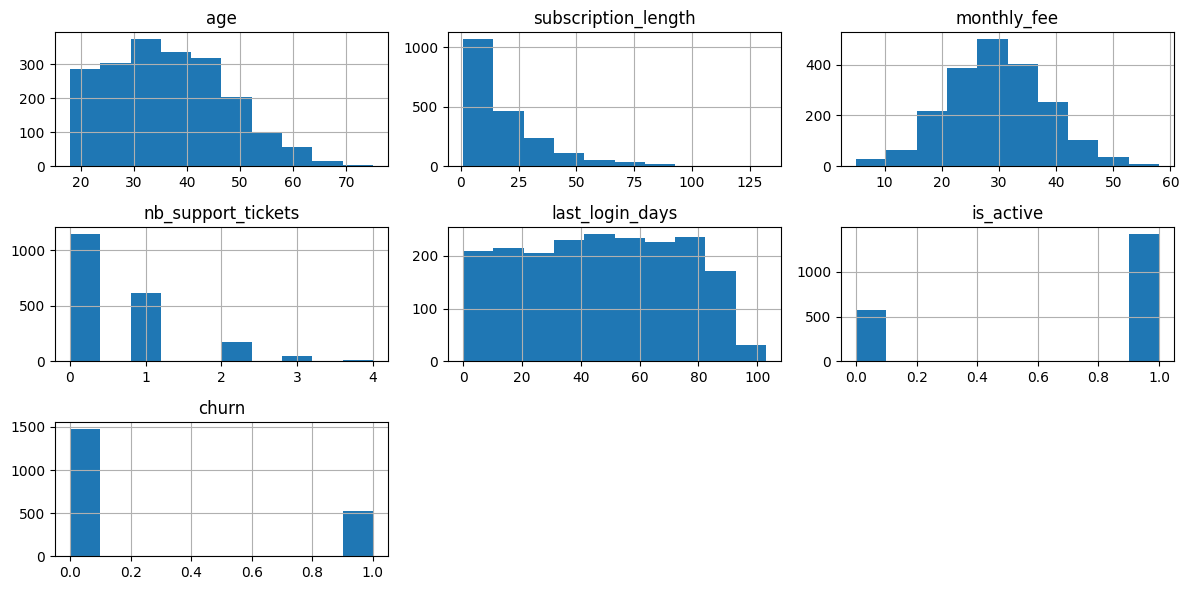

In [6]:
import matplotlib.pyplot as plt

df.hist(figsize=(12,6))
plt.tight_layout()
plt.show()


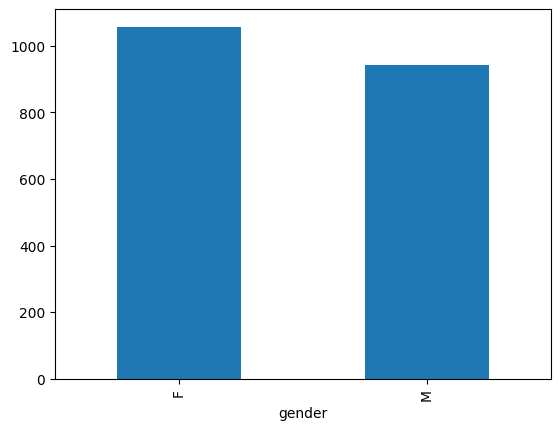

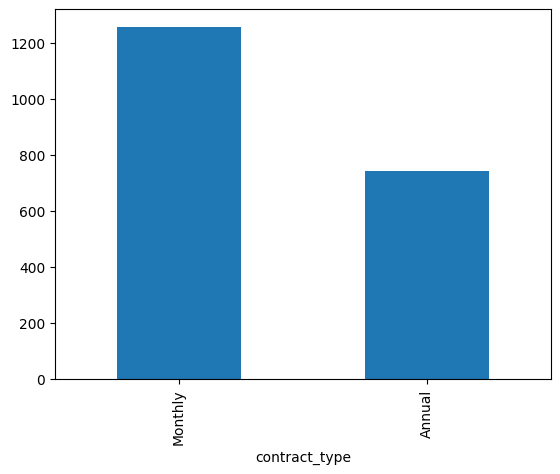

In [7]:
df["gender"].value_counts().plot(kind="bar")
plt.show()

df["contract_type"].value_counts().plot(kind="bar")
plt.show()


In [8]:
print("Statistiques descriptives :")
print(df.describe())


Statistiques descriptives :
               age  subscription_length  monthly_fee  nb_support_tickets  \
count  2000.000000          2000.000000  2000.000000          2000.00000   
mean     36.360000            18.902500    29.564645             0.57750   
std      11.212058            18.767528     8.637906             0.79329   
min      18.000000             1.000000     5.000000             0.00000   
25%      28.000000             6.000000    23.807500             0.00000   
50%      36.000000            13.000000    29.425000             0.00000   
75%      44.000000            26.000000    35.260000             1.00000   
max      75.000000           132.000000    58.020000             4.00000   

       last_login_days    is_active        churn  
count      2000.000000  2000.000000  2000.000000  
mean         46.797500     0.713000     0.260500  
std          26.402823     0.452475     0.439017  
min           0.000000     0.000000     0.000000  
25%          24.000000     0.000

In [9]:
print("\nRépartition du churn :")
print(df['churn'].value_counts(normalize=True))



Répartition du churn :
churn
0    0.7395
1    0.2605
Name: proportion, dtype: float64


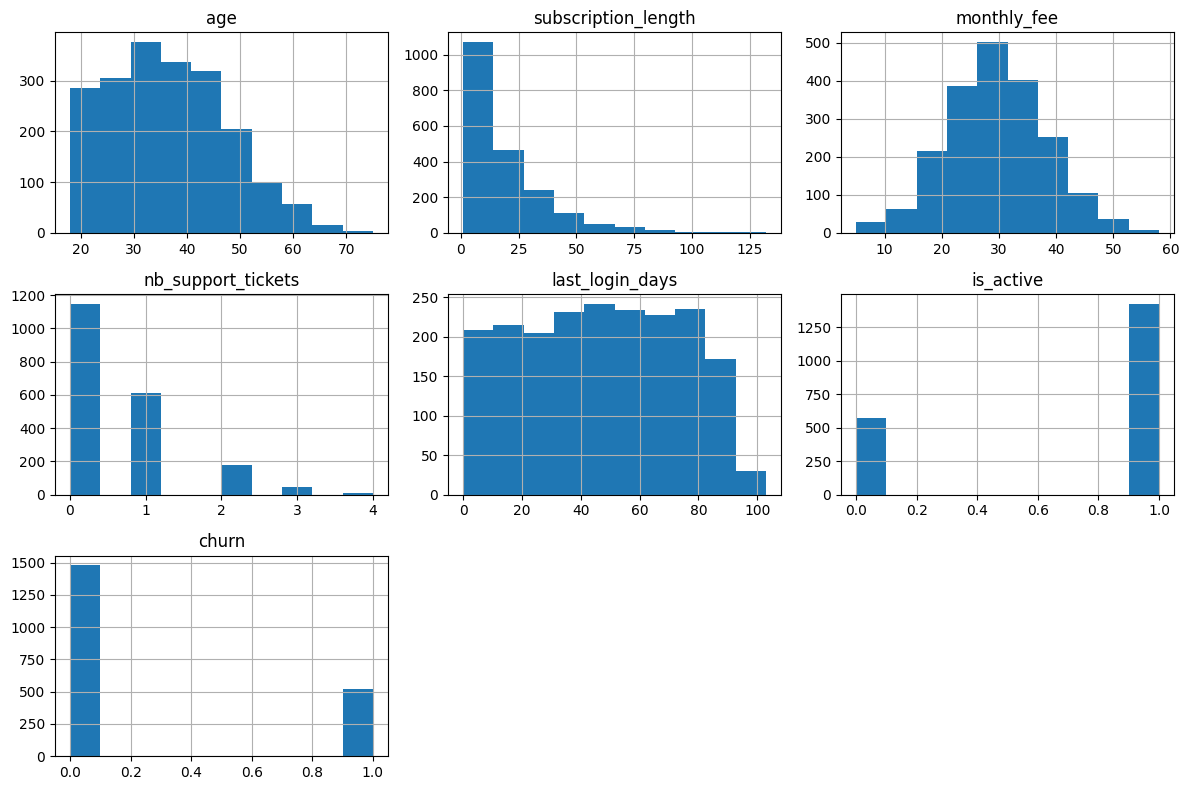

In [10]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()



Distribution de la cible churn :
churn
0    1479
1     521
Name: count, dtype: int64


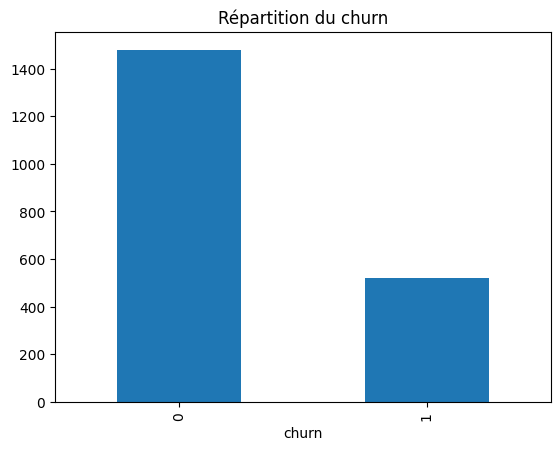

In [11]:
print("\nDistribution de la cible churn :")
print(df['churn'].value_counts())

df['churn'].value_counts().plot(kind='bar')
plt.title('Répartition du churn')
plt.show()


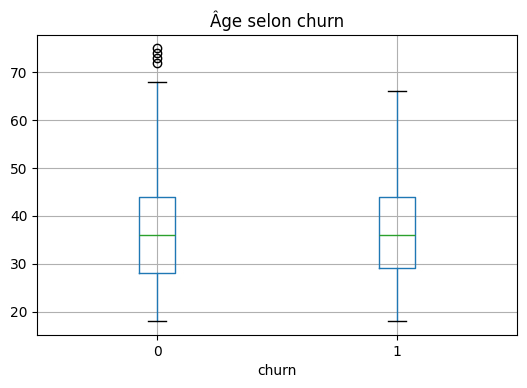

In [12]:
df.boxplot(column='age', by='churn', figsize=(6,4))
plt.title("Âge selon churn")
plt.suptitle("")
plt.show()


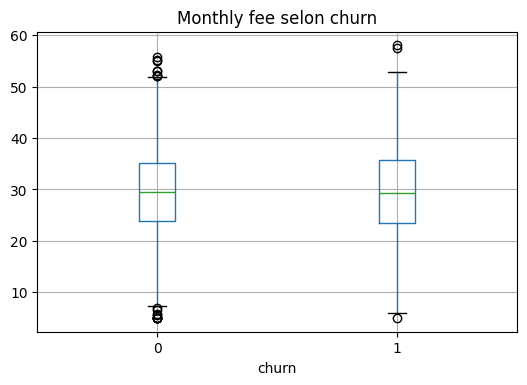

In [13]:
df.boxplot(column='monthly_fee', by='churn', figsize=(6,4))
plt.title("Monthly fee selon churn")
plt.suptitle("")
plt.show()


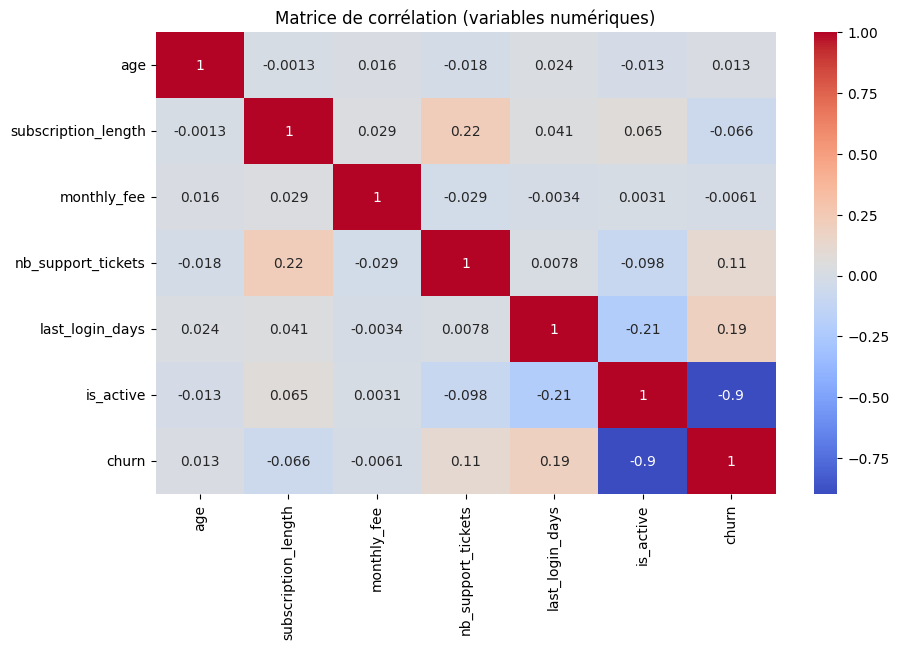

In [15]:
plt.figure(figsize=(10,6))

corr = df.select_dtypes(include=['int64', 'float64']).corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation (variables numériques)")
plt.show()


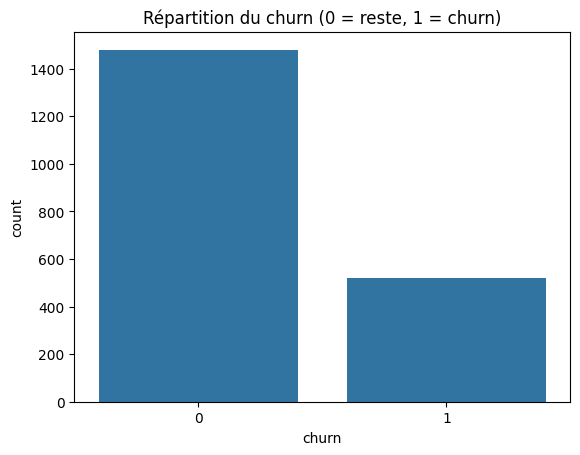

churn
0    0.7395
1    0.2605
Name: proportion, dtype: float64

In [16]:
sns.countplot(data=df, x="churn")
plt.title("Répartition du churn (0 = reste, 1 = churn)")
plt.show()

df["churn"].value_counts(normalize=True)


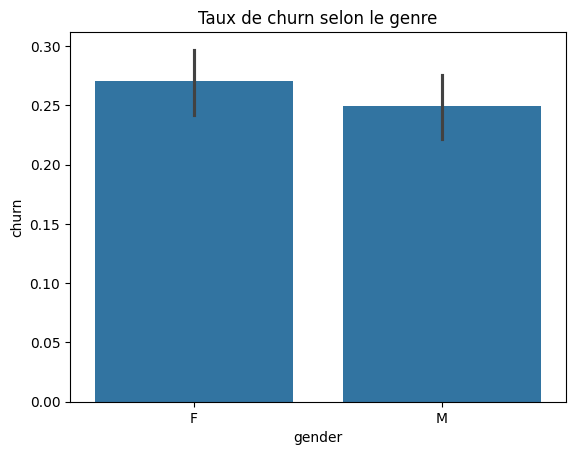

In [17]:
sns.barplot(data=df, x="gender", y="churn")
plt.title("Taux de churn selon le genre")
plt.show()


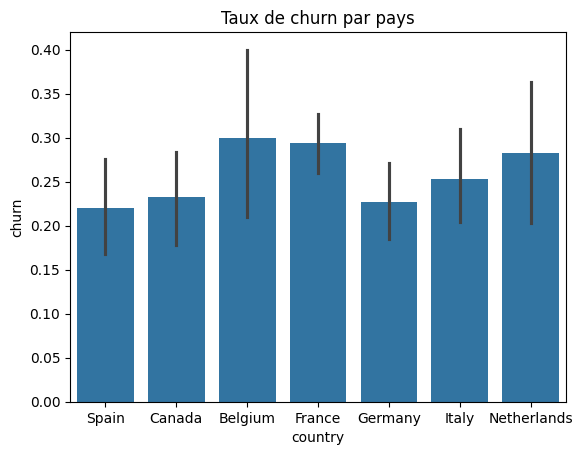

In [18]:
sns.barplot(data=df, x="country", y="churn")
plt.title("Taux de churn par pays")
plt.show()


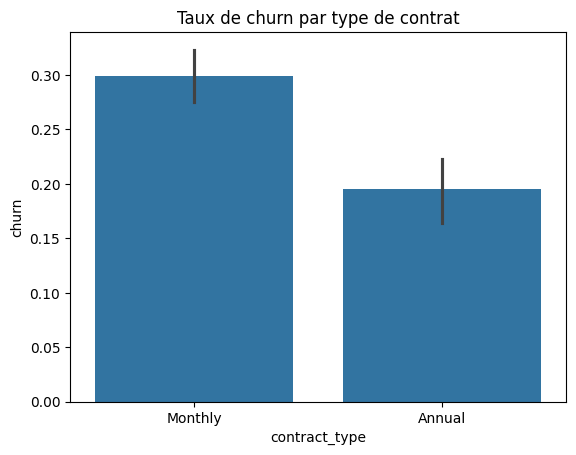

In [19]:
sns.barplot(data=df, x="contract_type", y="churn")
plt.title("Taux de churn par type de contrat")
plt.show()


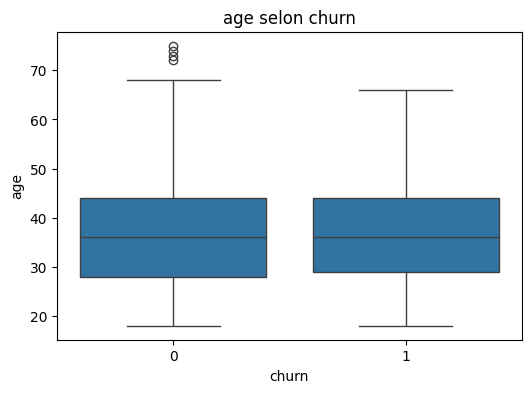

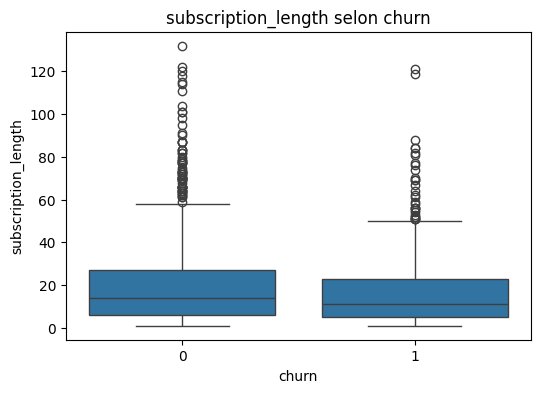

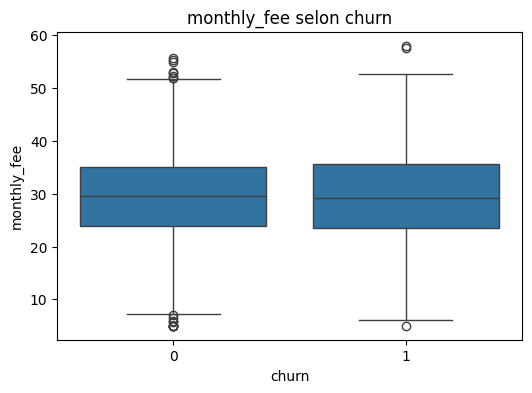

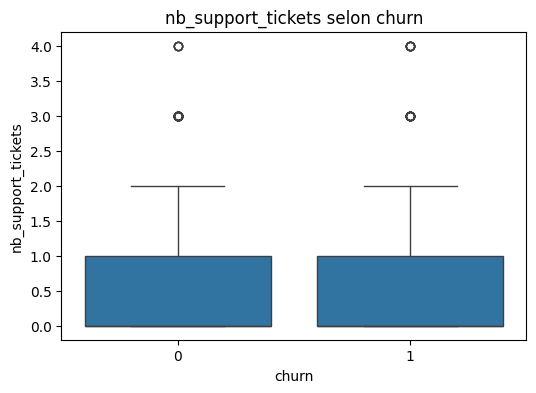

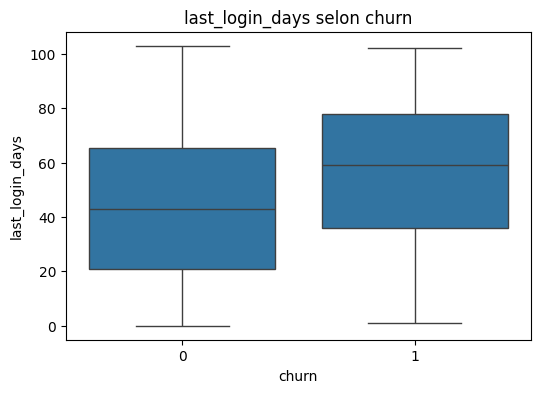

In [20]:
num_cols = ["age", "subscription_length", "monthly_fee",
            "nb_support_tickets", "last_login_days"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="churn", y=col)
    plt.title(f"{col} selon churn")
    plt.show()


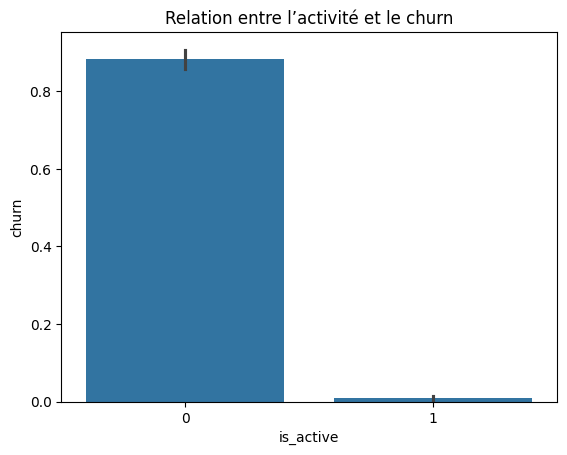

In [21]:
sns.barplot(data=df, x="is_active", y="churn")
plt.title("Relation entre l’activité et le churn")
plt.show()


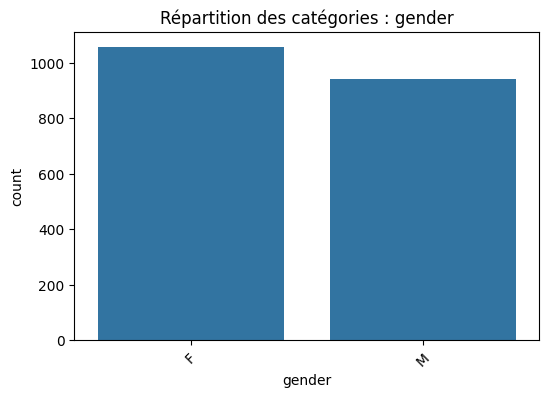

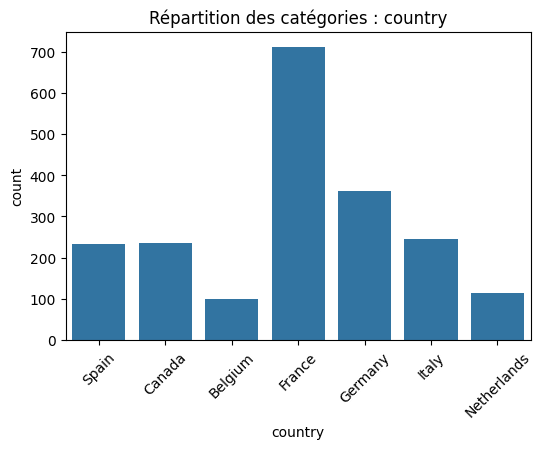

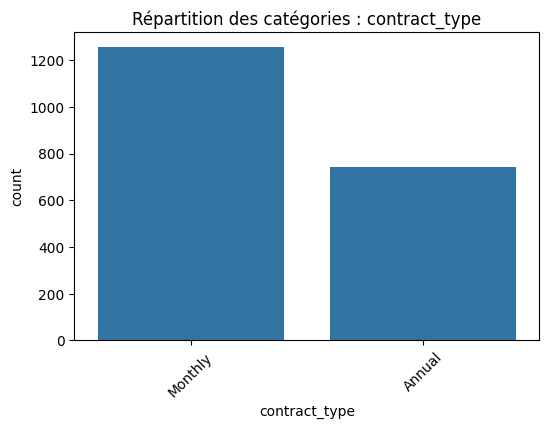

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ["gender", "country", "contract_type"]

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Répartition des catégories : {col}")
    plt.xticks(rotation=45)
    plt.show()


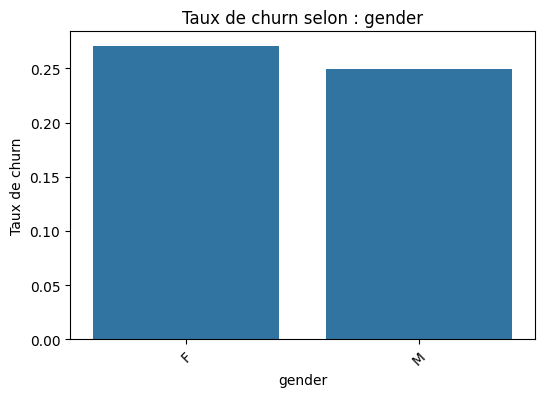

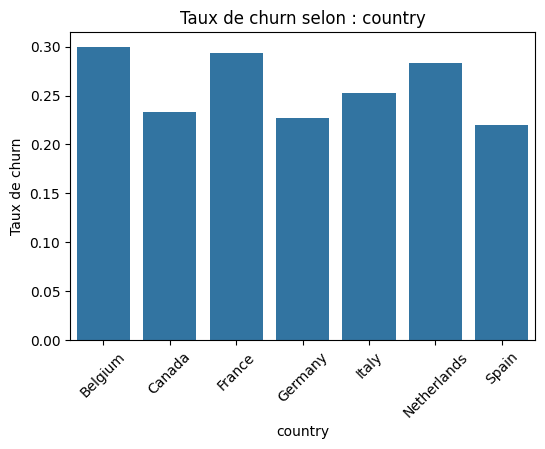

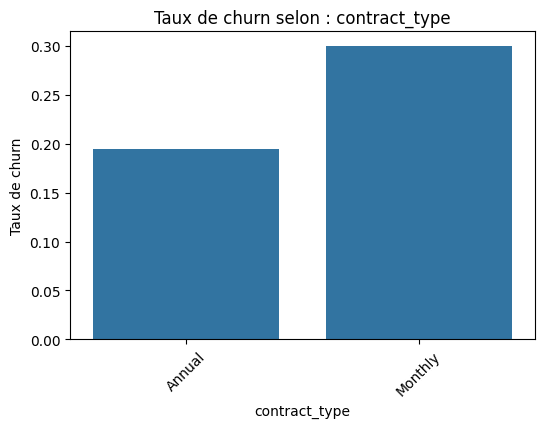

In [23]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    churn_rate = df.groupby(col)["churn"].mean()
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.title(f"Taux de churn selon : {col}")
    plt.ylabel("Taux de churn")
    plt.xticks(rotation=45)
    plt.show()


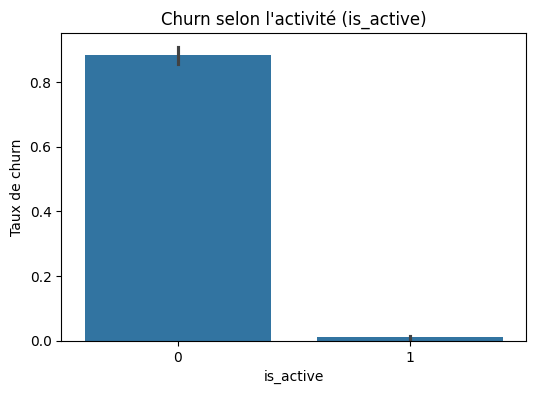

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(x=df["is_active"], y=df["churn"])
plt.title("Churn selon l'activité (is_active)")
plt.ylabel("Taux de churn")
plt.show()


In [26]:
df_model = df.copy()

df_model = pd.get_dummies(df_model, 
                          columns=['gender', 'country', 'contract_type'], 
                          drop_first=True)


In [27]:
X = df_model.drop("churn", axis=1)
y = df_model["churn"]


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [29]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['age', 'subscription_length', 'monthly_fee',
                  'nb_support_tickets', 'last_login_days']

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [30]:
X = df.drop("churn", axis=1)
y = df["churn"]


In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

categorical_cols = ["gender", "country", "contract_type"]
numeric_cols = ["age", "subscription_length", "monthly_fee", "nb_support_tickets", "last_login_days", "is_active"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [34]:
df = df.drop(columns=["customer_id"])


In [35]:
X = df.drop("churn", axis=1)
y = df["churn"]


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Colonnes catégorielles
cat_cols = ["gender", "country", "contract_type"]

# Préprocesseur
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ],
    remainder="passthrough"
)

# Modèle dans un pipeline
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("logreg", LogisticRegression(max_iter=1000))
])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement
model.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy : 0.9525
[[284  16]
 [  3  97]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       300
           1       0.86      0.97      0.91       100

    accuracy                           0.95       400
   macro avg       0.92      0.96      0.94       400
weighted avg       0.96      0.95      0.95       400



In [39]:
log_reg = model.named_steps["logreg"]


In [41]:
model.named_steps


{'preprocess': ColumnTransformer(remainder='passthrough',
                   transformers=[('cat', OneHotEncoder(drop='first'),
                                  ['gender', 'country', 'contract_type'])]),
 'logreg': LogisticRegression(max_iter=1000)}

In [42]:
# 1️⃣ Récupérer le transformeur
preprocess = model.named_steps["preprocess"]

# 2️⃣ Récupérer les noms des colonnes après transformation
feature_names = preprocess.get_feature_names_out()

feature_names


array(['cat__gender_M', 'cat__country_Canada', 'cat__country_France',
       'cat__country_Germany', 'cat__country_Italy',
       'cat__country_Netherlands', 'cat__country_Spain',
       'cat__contract_type_Monthly', 'remainder__age',
       'remainder__subscription_length', 'remainder__monthly_fee',
       'remainder__nb_support_tickets', 'remainder__last_login_days',
       'remainder__is_active'], dtype=object)

In [43]:
logreg = model.named_steps["logreg"]
coeffs = logreg.coef_[0]


In [44]:
import pandas as pd
import numpy as np

df_coeffs = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coeffs
})

df_coeffs["abs_coeff"] = np.abs(df_coeffs["coefficient"])
df_coeffs.sort_values(by="abs_coeff", ascending=False, inplace=True)

df_coeffs


,feature,coefficient,abs_coeff
13,remainder__is_active,-6.179502,6.179502
6,cat__country_Spain,-0.617197,0.617197
7,cat__contract_type_Monthly,0.464258,0.464258
1,cat__country_Canada,0.382193,0.382193
2,cat__country_France,0.381013,0.381013
11,remainder__nb_support_tickets,0.378537,0.378537
0,cat__gender_M,-0.186959,0.186959
4,cat__country_Italy,0.115727,0.115727
5,cat__country_Netherlands,0.113506,0.113506
3,cat__country_Germany,-0.053433,0.053433


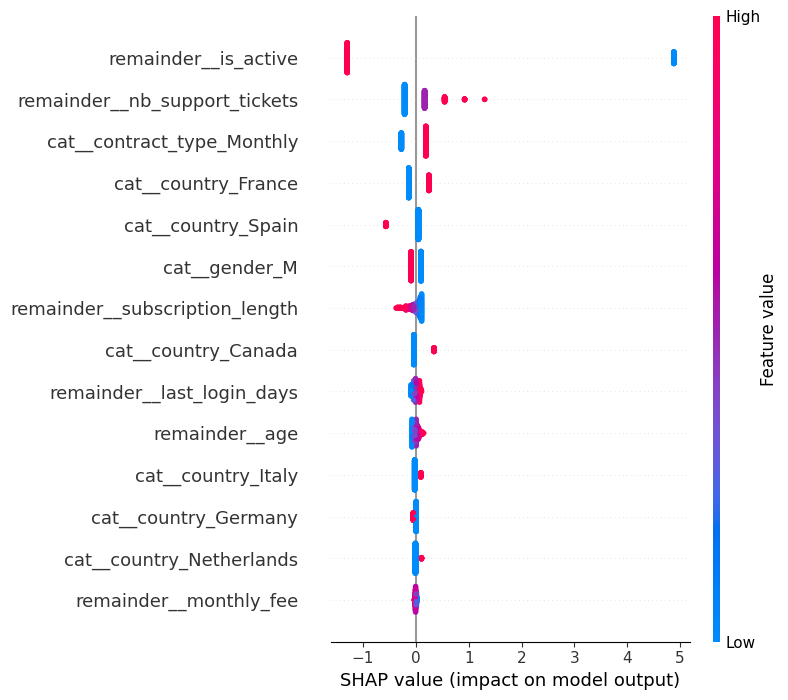

In [45]:
import shap

# 1️⃣ Créer un explainer SHAP sur ton modèle final (logistic regression)
explainer = shap.LinearExplainer(model.named_steps["logreg"], 
                                 model.named_steps["preprocess"].transform(X_train))

# 2️⃣ Calculer les valeurs SHAP sur X_test transformé
shap_values = explainer.shap_values(model.named_steps["preprocess"].transform(X_test))

# 3️⃣ Récupérer les noms des features après encodage
feature_names = model.named_steps["preprocess"].get_feature_names_out()

# 4️⃣ Résumé global SHAP
shap.summary_plot(shap_values, 
                  features=model.named_steps["preprocess"].transform(X_test),
                  feature_names=feature_names)


In [46]:
import joblib

joblib.dump(model, "modele_churn.pkl")


['modele_churn.pkl']

In [50]:
nouveau_client = pd.DataFrame([{
    "age": 30,
    "gender": "M",
    "country": "France",
    "subscription_length": 12,
    "monthly_fee": 25,
    "nb_support_tickets": 1,
    "last_login_days": 2,
    "contract_type": "Monthly",
    "is_active": 1
}])

model.predict(nouveau_client)


array([0])